# Importing the Required libraries :

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the dataset :


In [2]:
df = pd.read_csv('movie.csv')

In [3]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df.shape

(27278, 3)

So we have 27,278 Movies. We don't need genres column so we are dropping that column

In [5]:
# drop genres column
df.drop(['genres'],axis=1,inplace=True)

We need to import our another dataset in which we have ratings for the movie

In [7]:
# import rating dataset
rating = pd.read_csv('ratings.csv')

# columns
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
# we need user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
#then merge movie and rating data
df = pd.merge(df,rating)

In [10]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


As noted here one user has rated one or more than one movie. This means that one movie has been rated by more than one user.

In [11]:
df.shape

(98180, 4)

In our kaggle kernel,we don't have much memory so we have to subset our dataset,we are going to take 1M rows

In [12]:
df = df.iloc[:1000000]

In [13]:
df.shape

(98180, 4)

In [14]:
# basic stats
df.describe()

,movieId,userId,rating
count,98180.000000,98180.000000,98180.000000
mean,15938.331259,326.348747,3.502567
std,28668.177407,182.344624,1.040068
min,1.000000,1.000000,0.500000
25%,1193.000000,177.000000,3.000000
50%,2890.000000,325.000000,3.500000
75%,7121.000000,477.000000,4.000000
max,131237.000000,610.000000,5.000000


## Data Visualization

Let's find the average rating of each movie

In [15]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)    5.0
A Flintstones Christmas Carol (1994)                              5.0
Louis Theroux: Law & Disorder (2008)                              5.0
Sun Alley (Sonnenallee) (1999)                                    5.0
Miss Nobody (2010)                                                5.0
                                                                 ... 
Case 39 (2009)                                                    0.5
Secret Society (2002)                                             0.5
God's Not Dead (2014)                                             0.5
Glitter (2001)                                                    0.5
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002)               0.5
Name: rating, Length: 8747, dtype: float64

Let's find the number of rating a particular movie has received

In [16]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Forrest Gump (1994)                                       329
Shawshank Redemption, The (1994)                          317
Pulp Fiction (1994)                                       307
Silence of the Lambs, The (1991)                          279
Matrix, The (1999)                                        278
                                                         ... 
Lady Jane (1986)                                            1
Lady and the Duke, The (Anglaise et le duc, L') (2001)      1
Lady from Shanghai, The (1947)                              1
Ladybird Ladybird (1994)                                    1
À nous la liberté (Freedom for Us) (1931)                   1
Name: rating, Length: 8747, dtype: int64

Now we will going to make a datafame in which we will have rating and number of ratings column

In [17]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                                         rating  number of ratings
title                                                             
'71 (2014)                                  4.0                  1
'Hellboy': The Seeds of Creation (2004)     4.0                  1
'Round Midnight (1986)                      3.5                  2
'Salem's Lot (2004)                         5.0                  1
'Til There Was You (1997)                   4.0                  2


In [18]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
"Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)",5.0,1
A Flintstones Christmas Carol (1994),5.0,1
Louis Theroux: Law & Disorder (2008),5.0,1
Sun Alley (Sonnenallee) (1999),5.0,1
Miss Nobody (2010),5.0,1
...,...,...
Case 39 (2009),0.5,1
Secret Society (2002),0.5,1
God's Not Dead (2014),0.5,1


In [19]:
ratings.describe()

,rating,number of ratings
count,8747.000000,8747.00000
mean,3.258605,11.22442
std,0.835508,23.40435
min,0.500000,1.00000
25%,2.826050,1.00000
50%,3.400000,3.00000
75%,3.875000,10.00000
max,5.000000,329.00000


So from above we can see that we don't have any movie with rating 5

<function matplotlib.pyplot.show(close=None, block=None)>

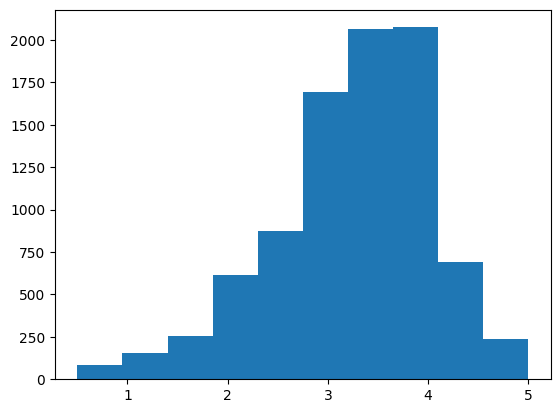

In [20]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

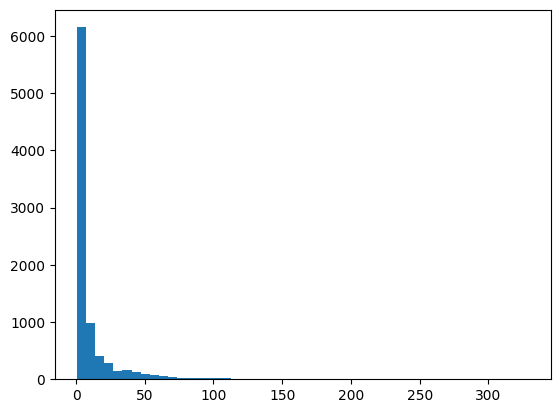

In [21]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

## Recommender System

In [22]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pivot_table.shape

(610, 8747)

Now we will make a function which will recommend the movie with their correlation score.Note that higher the correlation more the movie related to each other

In [24]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [29]:
recommend_movie('King Kong vs. Godzilla (Kingukongu tai Gojira) (1962)')

title
Good Morning, Vietnam (1987)                1.0
Battle for the Planet of the Apes (1973)    1.0
Stand by Me (1986)                          1.0
Independence Day (a.k.a. ID4) (1996)        1.0
As Good as It Gets (1997)                   1.0
dtype: float64

In [30]:
recommend_movie('Toy Story (1995)')

title
Rio 2 (2014)                     1.0
Trip to Bountiful, The (1985)    1.0
Toy Story (1995)                 1.0
Day at the Races, A (1937)       1.0
Days of Heaven (1978)            1.0
dtype: float64

In [31]:
recommend_movie('Avengers, The (1998)')

title
Swingers (1996)                              1.0
Avengers, The (1998)                         1.0
Excalibur (1981)                             1.0
Arsenic and Old Lace (1944)                  1.0
Sherlock Holmes: A Game of Shadows (2011)    1.0
dtype: float64